Accuracy: 0.68
Confusion Matrix:
 [[250  78]
 [ 89 113]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       328
           1       0.59      0.56      0.58       202

    accuracy                           0.68       530
   macro avg       0.66      0.66      0.66       530
weighted avg       0.68      0.68      0.68       530



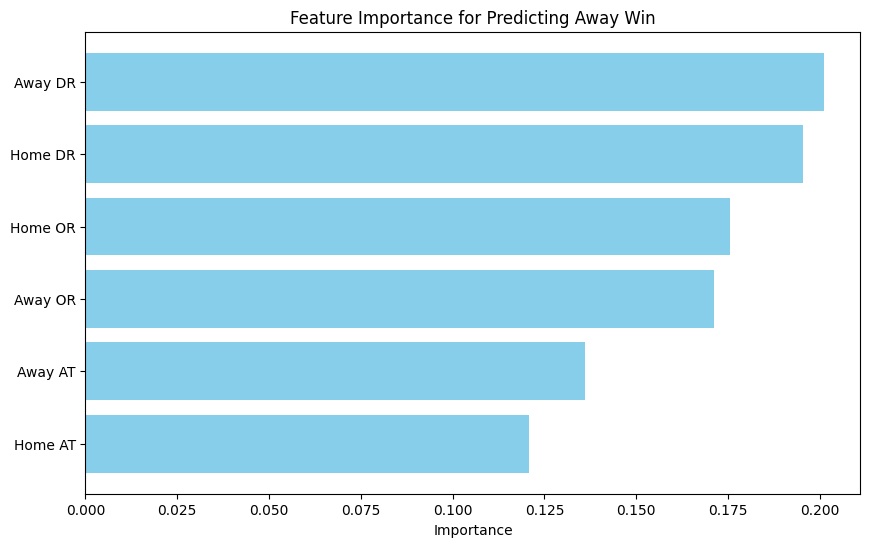

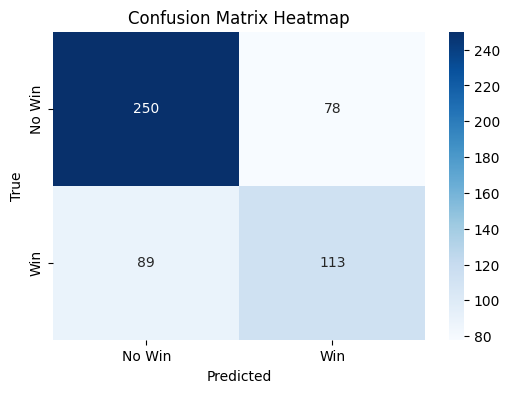

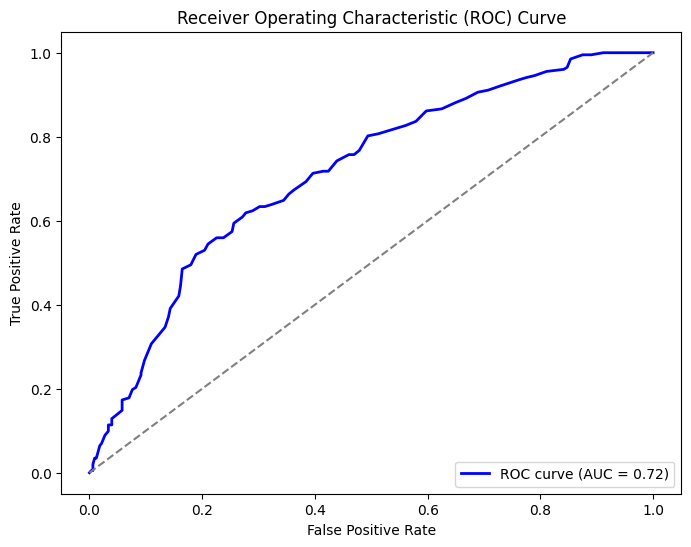

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

<Figure size 640x480 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import shap

# Load the data
df = pd.read_csv('SL311.csv')

df.dropna(inplace=True)
df = df.round(2)

# Features: Select relevant columns for prediction
features = ['Away OR', 'Away DR', 'Away AT', 'Home OR', 'Home DR', 'Home AT']
X = df[features]

# Target: Predict Away Win (1 = win, 0 = loss)
y = df['Away Win']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize a classifier (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Feature Importance Plot (Random Forest)
feature_importances = model.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame based on feature importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance for Predicting Away Win')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Win', 'Win'], yticklabels=['No Win', 'Win'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve and AUC
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# SHAP Feature Importance Plot
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values[1], X_train)  # Use [1] for class 1 (Away Win)

# Cross-Validation Scores
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.2f}")

# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# Plot the learning curves
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score', color='blue')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score', color='red')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.show()

# Model Comparison
models = {
    "Random Forest": model,
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Gradient Boosting": GradientBoostingClassifier()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} - Accuracy: {accuracy:.2f}")










